In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
regular_season_results_df = pd.read_csv('data/regular_season_results.csv')
regular_season_results_df

In [ ]:
tourney_seeds_df = pd.read_csv('data/tourney_seeds.csv')
tourney_seeds_df

In [ ]:
tourney_slots_df = pd.read_csv('data/tourney_slots.csv')
tourney_slots_df

In [ ]:
merge_df = regular_season_results_df[['season', 'wteam', 'lteam']]
merge_df = merge_df.merge(tourney_seeds_df, left_on=['season', 'wteam'], right_on=['season', 'team'])
merge_df = merge_df.merge(tourney_seeds_df, left_on=['season', 'lteam'], right_on=['season', 'team'])
merge_df = merge_df[['season', 'wteam', 'seed_x', 'lteam', 'seed_y']]
merge_df = merge_df.rename(columns={'seed_x': 'wseed', 'seed_y': 'lseed'})
merge_df['wseed'] = merge_df['wseed'].str[1:]
merge_df['lseed'] = merge_df['lseed'].str[1:]

In [ ]:
merge_df['vs'] = merge_df['wseed'] + '-' + merge_df['lseed']
merge_df

In [ ]:
higher_seed_won_df: pd.DataFrame = merge_df.loc[
    (merge_df['vs'] == '16-01') | (merge_df['vs'] == '15-02') | (merge_df['vs'] == '14-03') | (
                merge_df['vs'] == '13-04') | (merge_df['vs'] == '12-05') | (merge_df['vs'] == '11-06') | (
                merge_df['vs'] == '10-07') | (merge_df['vs'] == '09-08')
    ][['wseed', 'season']]

higher_seed_won_df

In [ ]:
higher_seed_lost_df = merge_df.loc[
    (merge_df['vs'] == '01-16') | (merge_df['vs'] == '02-15') | (merge_df['vs'] == '03-14') | (
                merge_df['vs'] == '04-13') | (merge_df['vs'] == '05-12') | (merge_df['vs'] == '06-11') | (
                merge_df['vs'] == '07-10') | (merge_df['vs'] == '08-09')
    ][['lseed', 'season']]

higher_seed_lost_df

In [ ]:
won_dict = higher_seed_won_df.groupby('wseed').count().to_dict().pop('season')

In [ ]:
lost_dict = higher_seed_lost_df.groupby('lseed').count().to_dict().pop('season')

In [ ]:
sum_dict = {i: 0 for i in lost_dict}

In [ ]:
for key in sum_dict:
    if key in won_dict:
        sum_dict[key] += won_dict[key]
    else:
        won_dict[key] = 0

    if key in lost_dict:
        sum_dict[key] += lost_dict[key]

In [ ]:
sum_dict

In [ ]:
percentage_dict = {i: won_dict[i] / sum_dict[i] for i in sum_dict}

In [ ]:
percentage_dict

In [ ]:
x_axis = list(reversed(percentage_dict.keys()))
x_axis = [f'{int(i)}-{16 - int(i) + 1}' for i in x_axis]
y_axis = list(reversed(percentage_dict.values()))

In [ ]:
plt.plot(x_axis, y_axis)
plt.xlabel('Seeds playing together')
plt.ylabel('Percentage of the higher seed winning')
plt.show()

START

In [55]:
regular_season_df = pd.read_csv('data/regular_season_detailed_results.csv')
tourney_df = pd.read_csv('data/tourney_detailed_results.csv')

In [83]:
data_df: pd.DataFrame = regular_season_df.loc[
    (regular_season_df['season'] == 2011) | (regular_season_df['season'] == 2012) | (
                regular_season_df['season'] == 2013) | (regular_season_df['season'] == 2014)
    ].reset_index(drop=True)

data_df_df = pd.concat([data_df, tourney_df.loc[
    (tourney_df['season'] == 2011) |\
    (tourney_df['season'] == 2012) |\
    (tourney_df['season'] == 2013)
]])

data_df['count_column'] = 1

In [85]:
data_df

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot,wfgm,wfga,...,lftm,lfta,lor,ldr,last,lto,lstl,lblk,lpf,count_column
0,2011,7,1228,79,1414,65,H,0,29,58,...,14,22,11,26,12,14,7,1,21,1
1,2011,7,1268,105,1370,76,H,0,35,62,...,17,22,18,16,11,27,18,1,31,1
2,2011,7,1338,83,1348,75,H,0,29,64,...,13,16,10,21,16,17,7,6,25,1
3,2011,7,1400,83,1298,52,H,0,30,59,...,10,18,8,22,8,16,5,5,24,1
4,2011,9,1228,84,1405,45,H,0,37,64,...,10,19,6,17,9,23,6,0,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21176,2014,132,1196,61,1246,60,N,0,23,53,...,21,26,12,24,9,12,4,8,19,1
21177,2014,132,1277,69,1276,55,N,0,27,54,...,15,16,13,15,7,9,3,3,15,1
21178,2014,132,1386,65,1433,61,N,0,24,50,...,8,15,13,25,9,5,6,6,18,1
21179,2014,132,1418,82,1209,81,N,1,32,75,...,20,21,4,26,8,7,5,7,15,1


TAKE 1

In [177]:
all_teams_df = pd.concat([data_df[['season', 'wteam']].rename(columns={'wteam': 'team'}), data_df[['season', 'lteam']].rename(columns={'lteam': 'team'})]).drop_duplicates()
#all_teams_df = all_teams_df.rename(columns={0: 'team'})
all_teams_df = all_teams_df.sort_values(by=['team'])
all_teams_df = all_teams_df.reset_index(drop=True)
all_teams_df

,season,team
0,2014,1101
1,2012,1102
2,2014,1102
3,2011,1102
4,2013,1102
...,...,...
1383,2013,1463
1384,2011,1464
1385,2014,1464
1386,2012,1464


In [178]:
all_teams_df = (
    all_teams_df
    .merge(data_df[['season', 'count_column', 'wteam', 'wfgm', 'wfga', 'wstl', 'wblk', 'wscore']], left_on=['season', 'team'], right_on=['season', 'wteam'])[['season', 'count_column', 'team', 'wfgm', 'wfga', 'wstl', 'wblk', 'wscore']]
    .groupby(['season', 'team'])
    .sum()
    .rename(columns={'count_column': 'win_count'})
    .reset_index()
)
all_teams_df

,season,team,win_count,wfgm,wfga,wstl,wblk,wscore
0,2011,1102,14,339,673,101,47,994
1,2011,1103,22,561,1237,159,83,1625
2,2011,1104,21,545,1199,214,127,1468
3,2011,1105,10,236,558,82,66,682
4,2011,1106,15,341,775,118,82,1040
...,...,...,...,...,...,...,...,...
1382,2014,1460,18,385,844,117,59,1218
1383,2014,1461,16,357,698,73,70,1116
1384,2014,1462,21,551,1116,138,74,1569
1385,2014,1463,14,311,701,83,65,1009


In [179]:
all_teams_df = (
    all_teams_df.copy()
    .merge(data_df[['season', 'count_column', 'lteam', 'lfgm', 'lfga', 'lstl', 'lblk', 'lscore']], left_on=['season', 'team'], right_on=['season', 'lteam'])[['season', 'count_column', 'team', 'win_count', 'wfgm', 'wfga', 'wstl', 'wblk', 'wscore', 'lfgm', 'lfga', 'lstl', 'lblk', 'lscore']]
    .groupby(['season', 'team', 'win_count', 'wfgm', 'wfga', 'wstl', 'wblk', 'wscore'])
    .sum()
    .rename(columns={'count_column': 'loss_count'})
    .reset_index()
)

all_teams_df

,season,team,win_count,wfgm,wfga,wstl,wblk,wscore,loss_count,lfgm,lfga,lstl,lblk,lscore
0,2011,1102,14,339,673,101,47,994,14,289,667,73,24,805
1,2011,1103,22,561,1237,159,83,1625,12,275,708,60,33,754
2,2011,1104,21,545,1199,214,127,1468,11,251,590,82,40,665
3,2011,1105,10,236,558,82,66,682,15,318,837,132,66,888
4,2011,1106,15,341,775,118,82,1040,17,328,907,116,64,930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,2014,1460,18,385,844,117,59,1218,14,325,736,98,35,909
1382,2014,1461,16,357,698,73,70,1116,14,297,688,62,44,823
1383,2014,1462,21,551,1116,138,74,1569,12,295,679,55,23,814
1384,2014,1463,14,311,701,83,65,1009,13,253,671,81,50,768


In [180]:
all_teams_df['fgm'] = all_teams_df['wfgm'] + all_teams_df['lfgm']
all_teams_df['fga'] = all_teams_df['wfga'] + all_teams_df['lfga']
all_teams_df['fgp'] = all_teams_df['fgm'] / all_teams_df['fga']
all_teams_df['stl'] = all_teams_df['wstl'] + all_teams_df['lstl']
all_teams_df['blk'] = all_teams_df['wblk'] + all_teams_df['lblk']
all_teams_df['points'] = all_teams_df['wscore'] + all_teams_df['lscore']
all_teams_df['mean_points'] = all_teams_df['points'].mean()
all_teams_df['win_percent'] = all_teams_df['win_count'] / (all_teams_df['win_count'] + all_teams_df['loss_count'])

In [181]:
all_teams_df = all_teams_df[['season', 'team', 'win_percent', 'win_count', 'loss_count', 'stl', 'blk', 'points', 'mean_points', 'fgp']]

In [182]:
opponents_df = pd.concat([
    all_teams_df.merge(data_df, left_on=['season', 'team'], right_on=['season', 'wteam'])[['season', 'team', 'lteam']].rename(columns={'lteam': 'opponents'}),
    all_teams_df.merge(data_df, left_on=['season', 'team'], right_on=['season', 'lteam'])[['season', 'team', 'wteam']].rename(columns={'wteam': 'opponents'})
]).drop_duplicates().groupby(['season', 'team']).agg(list)

opponents_df

opponents
season team                                                   
2011   1102  [1398, 1459, 1169, 1191, 1300, 1115, 1358, 119...
       1103  [1464, 1178, 1227, 1126, 1114, 1391, 1115, 133...
       1104  [1197, 1407, 1105, 1375, 1368, 1252, 1337, 140...
       1105  [1212, 1290, 1106, 1108, 1380, 1341, 1115, 144...
       1106  [1244, 1212, 1115, 1108, 1290, 1105, 1380, 134...
...                                                        ...
2014   1460  [1223, 1108, 1441, 1183, 1282, 1132, 1324, 143...
       1461  [1404, 1117, 1238, 1377, 1286, 1294, 1129, 136...
       1462  [1205, 1397, 1287, 1275, 1101, 1132, 1191, 115...
       1463  [1148, 1357, 1248, 1216, 1306, 1135, 1162, 116...
       1464  [1244, 1198, 1184, 1352, 1126, 1377, 1227, 115...

[1386 rows x 1 columns]

In [183]:
all_teams_df = all_teams_df.merge(opponents_df, on=['season', 'team'])
all_teams_df

,season,team,win_percent,win_count,loss_count,stl,blk,points,mean_points,fgp,opponents
0,2011,1102,0.500000,14,14,174,71,1799,2083.18759,0.468657,"[1398, 1459, 1169, 1191, 1300, 1115, 1358, 119..."
1,2011,1103,0.647059,22,12,219,116,2379,2083.18759,0.429820,"[1464, 1178, 1227, 1126, 1114, 1391, 1115, 133..."
2,2011,1104,0.656250,21,11,296,167,2133,2083.18759,0.444941,"[1197, 1407, 1105, 1375, 1368, 1252, 1337, 140..."
3,2011,1105,0.400000,10,15,214,132,1570,2083.18759,0.397133,"[1212, 1290, 1106, 1108, 1380, 1341, 1115, 144..."
4,2011,1106,0.468750,15,17,234,146,1970,2083.18759,0.397741,"[1244, 1212, 1115, 1108, 1290, 1105, 1380, 134..."
...,...,...,...,...,...,...,...,...,...,...,...
1381,2014,1460,0.562500,18,14,215,94,2127,2083.18759,0.449367,"[1223, 1108, 1441, 1183, 1282, 1132, 1324, 143..."
1382,2014,1461,0.533333,16,14,135,114,1939,2083.18759,0.471861,"[1404, 1117, 1238, 1377, 1286, 1294, 1129, 136..."
1383,2014,1462,0.636364,21,12,193,97,2383,2083.18759,0.471309,"[1205, 1397, 1287, 1275, 1101, 1132, 1191, 115..."
1384,2014,1463,0.518519,14,13,164,115,1777,2083.18759,0.411079,"[1148, 1357, 1248, 1216, 1306, 1135, 1162, 116..."


In [184]:
def calculate_opponents_win_percentage(opponents: list[int]) -> float:
    o_df = pd.DataFrame(opponents, columns=['opponent_team'])

    tmp_df = o_df.merge(all_teams_df, left_on='opponent_team', right_on='team')

    total_wins = tmp_df['win_count'].sum()
    total_losses = tmp_df['loss_count'].sum()

    return total_wins / (total_wins + total_losses)

Formula za RPI: https://www.nbastuffer.com/analytics101/relative-percentage-index-rpi/

In [185]:
def calculate_rpi(row: pd.Series) -> pd.Series:
    op = calculate_opponents_win_percentage(row['opponents'])

    o_df = pd.DataFrame(row['opponents'], columns=['opponent_team'])
    tmp_df = o_df.merge(all_teams_df, left_on='opponent_team', right_on='team')

    tmp_list = tmp_df['opponents'].tolist()
    oop_list = []
    for i in tmp_list:
        oop_list += i

    oop = calculate_opponents_win_percentage(oop_list)

    row['rpi'] = round((2 * op + oop) / 3 * 1000)

    return row

In [186]:
def calculate_bpi(row: pd.Series) -> pd.Series:
    win_count = row['win_count']
    loss_count = row['loss_count']
    total_count = win_count + loss_count

    points = row['points']
    mean_points = row['mean_points']

    row['bpi'] = (win_count / total_count) * (points - mean_points) / total_count

    return row

In [187]:
all_teams_df = all_teams_df.apply(calculate_rpi, axis=1)
all_teams_df = all_teams_df.apply(calculate_bpi, axis=1)
all_teams_df

,season,team,win_percent,win_count,loss_count,stl,blk,points,mean_points,fgp,opponents,rpi,bpi
0,2011,1102,0.500000,14,14,174,71,1799,2083.18759,0.468657,"[1398, 1459, 1169, 1191, 1300, 1115, 1358, 119...",523,-5.074778
1,2011,1103,0.647059,22,12,219,116,2379,2083.18759,0.429820,"[1464, 1178, 1227, 1126, 1114, 1391, 1115, 133...",500,5.629648
2,2011,1104,0.656250,21,11,296,167,2133,2083.18759,0.444941,"[1197, 1407, 1105, 1375, 1368, 1252, 1337, 140...",516,1.021544
3,2011,1105,0.400000,10,15,214,132,1570,2083.18759,0.397133,"[1212, 1290, 1106, 1108, 1380, 1341, 1115, 144...",470,-8.211001
4,2011,1106,0.468750,15,17,234,146,1970,2083.18759,0.397741,"[1244, 1212, 1115, 1108, 1290, 1105, 1380, 134...",464,-1.658021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,2014,1460,0.562500,18,14,215,94,2127,2083.18759,0.449367,"[1223, 1108, 1441, 1183, 1282, 1132, 1324, 143...",465,0.770140
1382,2014,1461,0.533333,16,14,135,114,1939,2083.18759,0.471861,"[1404, 1117, 1238, 1377, 1286, 1294, 1129, 136...",533,-2.563335
1383,2014,1462,0.636364,21,12,193,97,2383,2083.18759,0.471309,"[1205, 1397, 1287, 1275, 1101, 1132, 1191, 115...",538,5.781507
1384,2014,1463,0.518519,14,13,164,115,1777,2083.18759,0.411079,"[1148, 1357, 1248, 1216, 1306, 1135, 1162, 116...",498,-5.880146


In [188]:
data_enriched_df = data_df.merge(all_teams_df, left_on=['season', 'wteam'], right_on=['season', 'team'])
data_enriched_df = data_enriched_df.rename(columns={i: f'w{i}' for i in all_teams_df if i not in ['team', 'win_count', 'loss_count', 'opponents', 'mean_points']})
data_enriched_df.pop('team')
data_enriched_df.pop('count_column')

data_enriched_df

,wseason,daynum,wteam,wscore,lteam,lscore,wloc,numot,wfgm,wfga,...,win_count,loss_count,wstl,wblk,wpoints,mean_points,wfgp,opponents,wrpi,wbpi
0,2011,7,1228,79,1414,65,H,0,29,58,...,19,13,178,148,2281,2083.18759,0.467554,"[1414, 1405, 1356, 1268, 1463, 1444, 1314, 121...",575,3.670347
1,2011,9,1228,84,1405,45,H,0,37,64,...,19,13,178,148,2281,2083.18759,0.467554,"[1414, 1405, 1356, 1268, 1463, 1444, 1314, 121...",575,3.670347
2,2011,12,1228,85,1356,63,H,0,32,58,...,19,13,178,148,2281,2083.18759,0.467554,"[1414, 1405, 1356, 1268, 1463, 1444, 1314, 121...",575,3.670347
3,2011,18,1228,80,1268,76,N,0,28,60,...,19,13,178,148,2281,2083.18759,0.467554,"[1414, 1405, 1356, 1268, 1463, 1444, 1314, 121...",575,3.670347
4,2011,22,1228,73,1463,47,H,0,31,63,...,19,13,178,148,2281,2083.18759,0.467554,"[1414, 1405, 1356, 1268, 1463, 1444, 1314, 121...",575,3.670347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21143,2014,105,1212,83,1341,81,A,0,27,46,...,4,23,155,55,1766,2083.18759,0.407635,"[1108, 1341, 1290, 1238, 1177, 1266, 1283, 111...",451,-1.740398
21144,2014,119,1212,72,1290,70,H,0,22,53,...,4,23,155,55,1766,2083.18759,0.407635,"[1108, 1341, 1290, 1238, 1177, 1266, 1283, 111...",451,-1.740398
21145,2014,127,1212,84,1238,75,N,0,24,50,...,4,23,155,55,1766,2083.18759,0.407635,"[1108, 1341, 1290, 1238, 1177, 1266, 1283, 111...",451,-1.740398
21146,2014,102,1165,70,1171,67,H,0,22,54,...,1,26,113,73,1718,2083.18759,0.406536,"[1171, 1393, 1259, 1127, 1257, 1159, 1373, 134...",502,-0.500943


In [219]:
data_enriched_df = data_df.merge(all_teams_df, left_on=['season', 'wteam'], right_on=['season', 'team'])
data_enriched_df = data_enriched_df.rename(columns={i: f'w{i}' for i in all_teams_df if i not in ['team', 'win_count', 'loss_count', 'opponents', 'mean_points', 'season']})
data_enriched_df.pop('team')
data_enriched_df.pop('count_column')

data_enriched_df = data_enriched_df.merge(all_teams_df, left_on=['season', 'lteam'], right_on=['season', 'team'])
data_enriched_df = data_enriched_df.rename(columns={i: f'l{i}' for i in all_teams_df if i not in ['team', 'win_count', 'loss_count', 'opponents', 'mean_points', 'season']})
data_enriched_df.pop('team')

data_enriched_df = data_enriched_df[['season', 'wteam', 'lteam', 'wscore', 'lscore'] + [f'w{i}' for i in all_teams_df if i not in ['team', 'win_count', 'loss_count', 'opponents', 'mean_points', 'season']] + [f'l{i}' for i in all_teams_df if i not in ['team', 'win_count', 'loss_count', 'opponents', 'mean_points', 'season']]]

data_enriched_df['wstl'] = data_enriched_df.pop('wstl').loc[:, [False, True]]
data_enriched_df['lstl'] = data_enriched_df.pop('lstl').loc[:, [False, True]]
data_enriched_df['wblk'] = data_enriched_df.pop('wblk').loc[:, [False, True]]
data_enriched_df['lblk'] = data_enriched_df.pop('lblk').loc[:, [False, True]]

data_enriched_df['rpi_diff'] = data_enriched_df['wrpi'] - data_enriched_df['lrpi']
data_enriched_df['bpi_diff'] = data_enriched_df['wbpi'] - data_enriched_df['lbpi']
data_enriched_df['point_diff'] = data_enriched_df['wpoints'] - data_enriched_df['lpoints']
data_enriched_df['steal_diff'] = data_enriched_df['wstl'] - data_enriched_df['lstl']
data_enriched_df['block_diff'] = data_enriched_df['wblk'] - data_enriched_df['lblk']
data_enriched_df['field_goal_percent_diff'] = data_enriched_df['wfgp'] - data_enriched_df['lfgp']

data_enriched_df

,season,wteam,lteam,wscore,lscore,wwin_percent,wpoints,wfgp,wrpi,wbpi,...,wstl,lstl,wblk,lblk,rpi_diff,bpi_diff,point_diff,steal_diff,block_diff,field_goal_percent_diff
0,2011,1228,1414,79,65,0.593750,2281,0.467554,575,3.670347,...,178,202,148,53,116,0.813169,-31,-24,95,0.048962
1,2011,1334,1414,75,51,0.482759,1879,0.433534,497,-3.399080,...,129,202,53,53,38,-6.256259,-433,-73,0,0.014942
2,2011,1363,1414,85,70,0.516129,2222,0.399680,500,2.311133,...,167,202,73,53,41,-0.546046,-90,-35,20,-0.018912
3,2011,1364,1414,71,58,0.551724,1968,0.450941,507,-2.191440,...,209,202,121,53,48,-5.048619,-344,7,68,0.032349
4,2011,1417,1414,74,73,0.687500,2239,0.456395,548,3.347532,...,174,202,185,53,89,0.490353,-73,-28,132,0.037803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21115,2014,1368,1230,76,72,0.357143,1902,0.436291,460,-2.311066,...,119,100,110,54,22,34.936437,750,19,56,-0.026050
21116,2014,1372,1230,76,74,0.935484,2351,0.461407,438,8.081748,...,218,100,98,54,0,45.329252,1199,118,44,-0.000933
21117,2014,1317,1230,84,67,0.466667,2075,0.419977,507,-0.127363,...,195,100,107,54,69,37.120141,923,95,53,-0.042364
21118,2014,1322,1230,100,86,0.517241,2478,0.467802,472,7.041838,...,235,100,145,54,34,44.289342,1326,135,91,0.005461


In [220]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [221]:
poly = PolynomialFeatures(degree=2, include_bias=False)

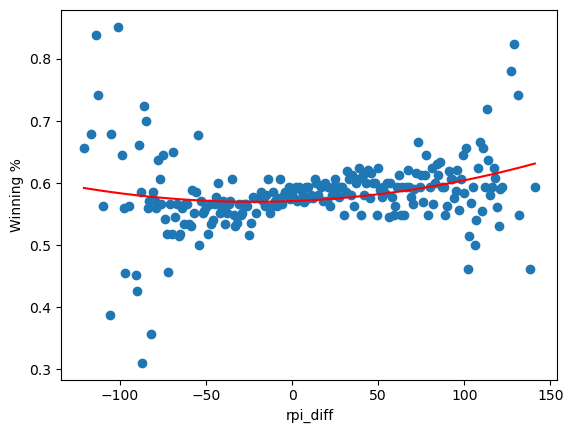

In [222]:
model = LinearRegression()

a = 'rpi_diff'

test = data_enriched_df[[a, 'wwin_percent']].groupby(a).median().reset_index()
# test['rpi_diff'] = test['rpi_diff'].abs()

d = test[a].to_numpy()
poly_features = poly.fit_transform(d.reshape(-1, 1))

model.fit(poly_features, test['wwin_percent'])

plt.xlabel(a)
plt.ylabel('Winning %')
plt.plot(d, model.predict(poly_features), c='red')
plt.scatter(d, test['wwin_percent'])
plt.show()

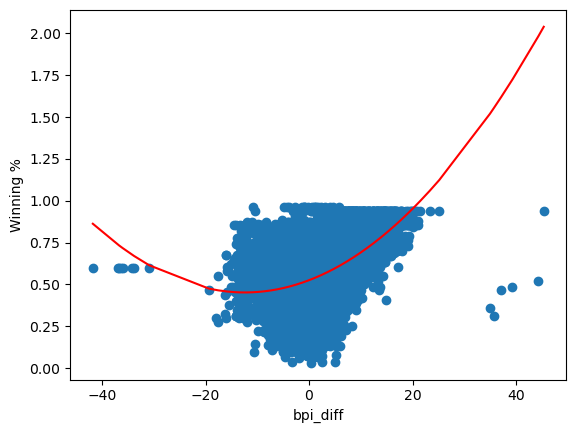

In [223]:
model = LinearRegression()

a = 'bpi_diff'

test = data_enriched_df[[a, 'wwin_percent']].groupby(a).median().reset_index()
# test['rpi_diff'] = test['rpi_diff'].abs()

d = test[a].to_numpy()
poly_features = poly.fit_transform(d.reshape(-1, 1))

model.fit(poly_features, test['wwin_percent'])

plt.xlabel(a)
plt.ylabel('Winning %')
plt.plot(d, model.predict(poly_features), c='red')
plt.scatter(d, test['wwin_percent'])
plt.show()

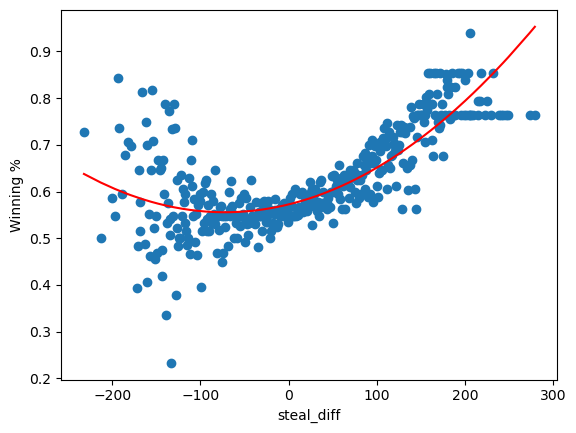

In [224]:
model = LinearRegression()

a = 'steal_diff'

test = data_enriched_df[[a, 'wwin_percent']].groupby(a).median().reset_index()
# test['rpi_diff'] = test['rpi_diff'].abs()

d = test[a].to_numpy()
poly_features = poly.fit_transform(d.reshape(-1, 1))

model.fit(poly_features, test['wwin_percent'])

plt.xlabel(a)
plt.ylabel('Winning %')
plt.plot(d, model.predict(poly_features), c='red')
plt.scatter(d, test['wwin_percent'])
plt.show()

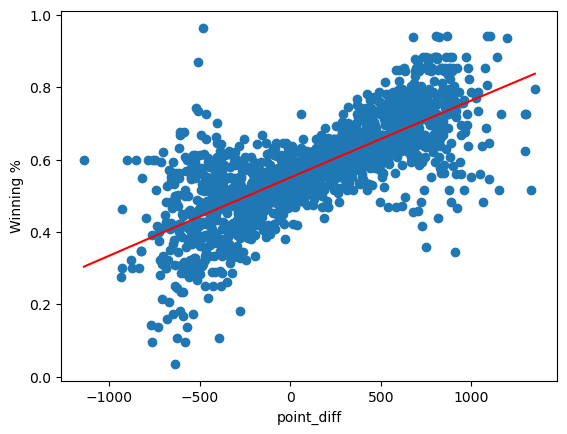

In [225]:
model = LinearRegression()

a = 'point_diff'

test = data_enriched_df[[a, 'wwin_percent']].groupby(a).median().reset_index()
# test['rpi_diff'] = test['rpi_diff'].abs()

d = test[a].to_numpy()
poly_features = poly.fit_transform(d.reshape(-1, 1))

model.fit(poly_features, test['wwin_percent'])

plt.xlabel(a)
plt.ylabel('Winning %')
plt.plot(d, model.predict(poly_features), c='red')
plt.scatter(d, test['wwin_percent'])
plt.show()

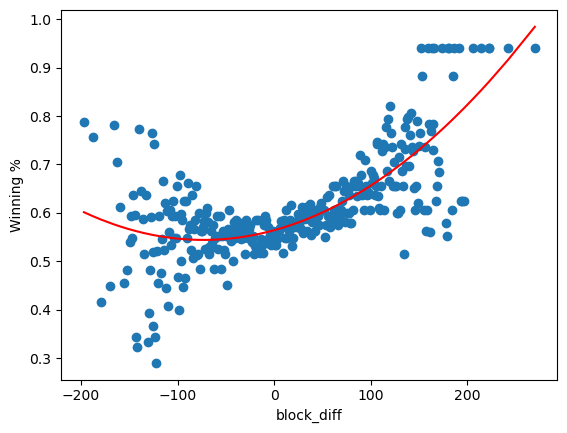

In [226]:
model = LinearRegression()

a = 'block_diff'

test = data_enriched_df[[a, 'wwin_percent']].groupby(a).median().reset_index()
# test['rpi_diff'] = test['rpi_diff'].abs()

d = test[a].to_numpy()
poly_features = poly.fit_transform(d.reshape(-1, 1))

model.fit(poly_features, test['wwin_percent'])

plt.xlabel(a)
plt.ylabel('Winning %')
plt.plot(d, model.predict(poly_features), c='red')
plt.scatter(d, test['wwin_percent'])
plt.show()

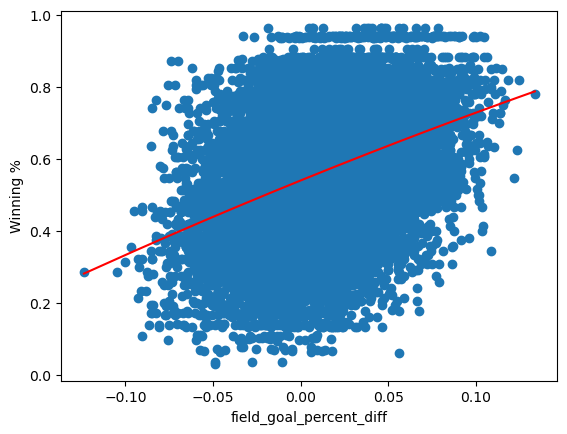

In [227]:
model = LinearRegression()

a = 'field_goal_percent_diff'

test = data_enriched_df[[a, 'wwin_percent']].groupby(a).median().reset_index()
# test['rpi_diff'] = test['rpi_diff'].abs()

d = test[a].to_numpy()
poly_features = poly.fit_transform(d.reshape(-1, 1))

model.fit(poly_features, test['wwin_percent'])

plt.xlabel(a)
plt.ylabel('Winning %')
plt.plot(d, model.predict(poly_features), c='red')
plt.scatter(d, test['wwin_percent'])
plt.show()